In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from gensim.corpora.dictionary import Dictionary as gdict
from sklearn.model_selection import train_test_split
import tensorflow as tf


nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
df_raw = pd.read_csv('IMDBDataset.csv')

In [3]:
df_raw.shape

(50000, 2)

In [4]:
df_raw.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [47]:
df_raw['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

# Data preparation

In [5]:
df = df_raw.copy()

In [6]:
# map sentiment into binary variables

binary_map =  {'negative':0, 'positive': 1}
df['sentiment'] = df['sentiment'].map(binary_map)

In [7]:
reviews_raw = df['review']

In [8]:
reviews_raw

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [9]:
df['sentiment'].value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

In [10]:
def convert_lower(text):
    return text.lower()

In [11]:
df['review'] = df['review'].apply(convert_lower)

In [12]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production. <br /><br />the...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there's a family where a little boy ...,0
4,"petter mattei's ""love in the time of money"" is...",1


# Tokenize to map the words into integers

In [14]:
df["review"] = df["review"].map(lambda x: x.split(' '))

In [15]:
my_dict = gdict(df['review'])

In [16]:
len(my_dict)

392053

In [17]:
my_dict.filter_extremes(no_below=1, no_above=1, keep_n=5000)

In [18]:
df["bow"] = df["review"].map(my_dict.doc2bow)

In [19]:
df.head()

,review,sentiment,bow
0,"[one, of, the, other, reviewers, has, mentione...",1,"[(0, 3), (1, 1), (2, 1), (3, 1), (4, 1), (5, 3..."
1,"[a, wonderful, little, production., <br, /><br...",1,"[(0, 3), (3, 3), (5, 4), (6, 1), (8, 2), (10, ..."
2,"[i, thought, this, was, a, wonderful, way, to,...",1,"[(0, 2), (5, 6), (10, 4), (12, 1), (16, 2), (1..."
3,"[basically, there's, a, family, where, a, litt...",0,"[(0, 3), (5, 10), (8, 3), (10, 4), (12, 2), (1..."
4,"[petter, mattei's, ""love, in, the, time, of, m...",1,"[(0, 4), (3, 2), (5, 6), (6, 2), (8, 2), (10, ..."


In [20]:
df2 = pd.concat([pd.DataFrame(s).set_index(0) for s in df["bow"]], axis=1).fillna(0).T.set_index(df.index)

In [21]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,3.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,0.0,0.0,3.0,0.0,4.0,1.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,0.0,0.0,2.0,0.0,6.0,2.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
df2.astype('int32')

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,3,1,1,1,1,3,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,3,0,4,1,0,2,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,10,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,2,0,6,2,0,2,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,0,0,0,5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49996,2,0,0,1,0,3,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
49997,2,0,0,0,0,7,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
49998,0,0,0,0,0,3,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df2.shape

(50000, 5000)

In [24]:
df['sentiment']

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64

In [90]:
df_preprocessed = pd.concat([df2,df['sentiment']], axis=1)

In [91]:
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 5001 entries, 0 to sentiment
dtypes: float64(5000), int64(1)
memory usage: 1.9 GB


In [92]:
df_preprocessed.head()

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,sentiment
0,3.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,3.0,0.0,0.0,3.0,0.0,4.0,1.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,3.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,4.0,0.0,0.0,2.0,0.0,6.0,2.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


## Check balance

In [93]:
df_preprocessed['sentiment'].value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

In [103]:
sum_token = df_preprocessed.iloc[:, :5000].sum(axis=1)

In [104]:
df_check_token_balanced = pd.concat([sum_token, df_preprocessed['sentiment']], axis=1)

In [105]:
df_check_token_balanced.columns

Index([0, 'sentiment'], dtype='object')

In [106]:
df_check_token_balanced.iloc[-1].unique()

array([116.,   0.])

In [107]:
df_check_token_balanced.value_counts()

0       sentiment
117.0   1            212
115.0   0            210
111.0   0            207
113.0   0            202
119.0   0            197
                    ... 
740.0   0              1
741.0   1              1
743.0   1              1
744.0   1              1
1909.0  1              1
Length: 1676, dtype: int64

In [108]:
df_check_token_balanced.columns =['sum_token', 'sentiment']

In [109]:
df_check_token_balanced.head()

,sum_token,sentiment
0,248.0,1
1,133.0,1
2,140.0,1
3,117.0,0
4,193.0,1


<AxesSubplot:xlabel='sentiment', ylabel='sum_token'>

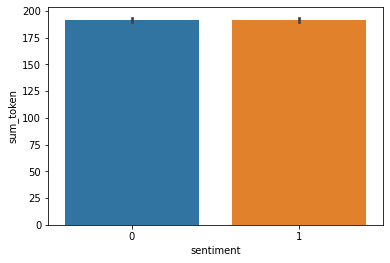

In [110]:
sns.barplot(data = df_check_token_balanced, x = "sentiment" , y ="sum_token")

the dataset is balanced

In [112]:
# this line takes 5mins+ and may use up all memories
# df_preprocessed.to_csv('data_processed.csv', header=0)

# Declaring observations and targets

In [28]:
df_preprocessed.shape

(50000, 5001)

In [29]:
df_preprocessed.iloc[-1]

0            1.0
1            1.0
2            0.0
3            0.0
4            0.0
            ... 
4996         0.0
4997         0.0
4998         0.0
4999         0.0
sentiment    0.0
Name: 49999, Length: 5001, dtype: float64

In [30]:
X = df_preprocessed.iloc[:, :5000].copy()

In [31]:
y = df_preprocessed.iloc[:, -1].copy()

In [32]:
X.head(2)

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,3.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,0.0,0.0,3.0,0.0,4.0,1.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
y.head(2)

0    1
1    1
Name: sentiment, dtype: int64

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state = 42)

In [35]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 39087 to 15795
Columns: 5000 entries, 0 to 4999
dtypes: float64(5000)
memory usage: 1.5 GB


In [36]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 40000 entries, 39087 to 15795
Series name: sentiment
Non-Null Count  Dtype
--------------  -----
40000 non-null  int64
dtypes: int64(1)
memory usage: 625.0 KB


In [37]:
y_train = y_train.astype('float64')
y_test = y_test.astype('float64')

In [38]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40000, 5000)
(10000, 5000)
(40000,)
(10000,)


# Network Architecture

In [39]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=16, activation='relu',input_shape=(5000,)),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=1,activation='sigmoid')
])

In [40]:
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy', tf.keras.metrics.Recall(thresholds=0),])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80016     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 80,305
Trainable params: 80,305
Non-trainable params: 0
_________________________________________________________________


# model performance

In [42]:
X_train_1 = X_train[3000:]
X_val = X_train[:3000]
y_train_1 = y_train[3000:]
y_val = y_train[:3000]

In [43]:
h = model.fit(
        x=X_train_1, 
        y=y_train_1,
        epochs = 50,
        batch_size = 512,
        validation_data=(X_val, y_val),
        verbose= 2
             )

Epoch 1/50
73/73 - 8s - loss: 0.6875 - accuracy: 0.5446 - recall: 1.0000 - val_loss: 0.6657 - val_accuracy: 0.6303 - val_recall: 1.0000 - 8s/epoch - 110ms/step
Epoch 2/50
73/73 - 1s - loss: 0.6543 - accuracy: 0.6295 - recall: 1.0000 - val_loss: 0.6287 - val_accuracy: 0.6847 - val_recall: 1.0000 - 1s/epoch - 16ms/step
Epoch 3/50
73/73 - 1s - loss: 0.6276 - accuracy: 0.6686 - recall: 1.0000 - val_loss: 0.5982 - val_accuracy: 0.7257 - val_recall: 1.0000 - 1s/epoch - 15ms/step
Epoch 4/50
73/73 - 1s - loss: 0.6050 - accuracy: 0.6951 - recall: 1.0000 - val_loss: 0.5761 - val_accuracy: 0.7453 - val_recall: 1.0000 - 1s/epoch - 14ms/step
Epoch 5/50
73/73 - 1s - loss: 0.5836 - accuracy: 0.7192 - recall: 1.0000 - val_loss: 0.5576 - val_accuracy: 0.7513 - val_recall: 1.0000 - 956ms/epoch - 13ms/step
Epoch 6/50
73/73 - 1s - loss: 0.5665 - accuracy: 0.7341 - recall: 1.0000 - val_loss: 0.5390 - val_accuracy: 0.7620 - val_recall: 1.0000 - 907ms/epoch - 12ms/step
Epoch 7/50
73/73 - 1s - loss: 0.5473 - 

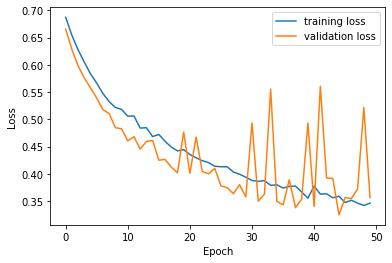

In [44]:
plt.plot(h.history['loss'], label='training loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

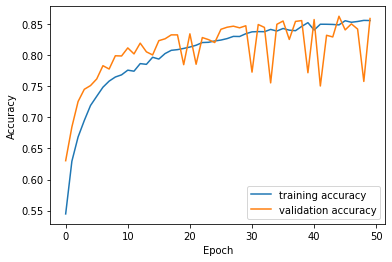

In [45]:
plt.plot(h.history['accuracy'], label='training accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [46]:
test_results = {}

test_results['model'] = model.evaluate(
    X_test, y_test, verbose=0)

print(f" Accuracy: {test_results}")

 Accuracy: {'model': [0.3570615351200104, 0.8521000146865845, 1.0]}


https://www.freecodecamp.org/news/how-to-evaluate-machine-learning-models-using-tensorboard/

In [ ]:
# precision and recall
